In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("D:\\PG-DBDA\\Advanced stastical Analysis\\diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
X = df.drop(['Outcome'], axis=1)

y = df['Outcome']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [8]:
X_train.shape, X_test.shape

((514, 8), (254, 8))

In [9]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
encoder = MinMaxScaler()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

pd.DataFrame(X_train, columns = X.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.588235,0.577889,0.803279,0.000000,0.000000,0.357675,0.403074,0.216667
1,0.411765,0.713568,0.491803,0.523810,0.224586,0.429210,0.260034,0.666667
2,0.235294,0.582915,0.590164,0.190476,0.102837,0.329359,0.164389,0.266667
3,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333
4,0.176471,0.391960,0.573770,0.000000,0.000000,0.484352,0.081981,0.300000
...,...,...,...,...,...,...,...,...
509,0.294118,0.698492,0.524590,0.555556,0.165485,0.426230,0.142186,0.083333
510,0.058824,0.482412,1.000000,0.000000,0.000000,0.333830,0.055081,0.100000
511,0.588235,0.507538,0.704918,0.587302,0.000000,0.679583,0.451751,0.283333
512,0.000000,0.708543,0.000000,0.000000,0.000000,0.631893,0.054227,0.133333


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [22]:
y_pred_gini = clf_gini.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6929


In [24]:
#compare the train-set and test-set accuracy to check for overfitting

In [25]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7724
Test set score: 0.6929


[Text(0.5, 0.875, 'x[1] <= 0.776\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.25, 0.625, 'x[7] <= 0.158\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.125, 0.375, 'x[1] <= 0.641\ngini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.0625, 0.125, 'gini = 0.153\nsamples = 203\nvalue = [186, 17]'),
 Text(0.1875, 0.125, 'gini = 0.469\nsamples = 48\nvalue = [30, 18]'),
 Text(0.375, 0.375, 'x[5] <= 0.402\ngini = 0.487\nsamples = 181\nvalue = [105, 76]'),
 Text(0.3125, 0.125, 'gini = 0.105\nsamples = 36\nvalue = [34, 2]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 145\nvalue = [71, 74]'),
 Text(0.75, 0.625, 'x[5] <= 0.428\ngini = 0.232\nsamples = 82\nvalue = [11, 71]'),
 Text(0.625, 0.375, 'x[5] <= 0.378\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6875, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.875, 0.375, 'x[6] <= 0.576\ngini = 0.157\nsamples = 70\nvalue = [6, 64]')

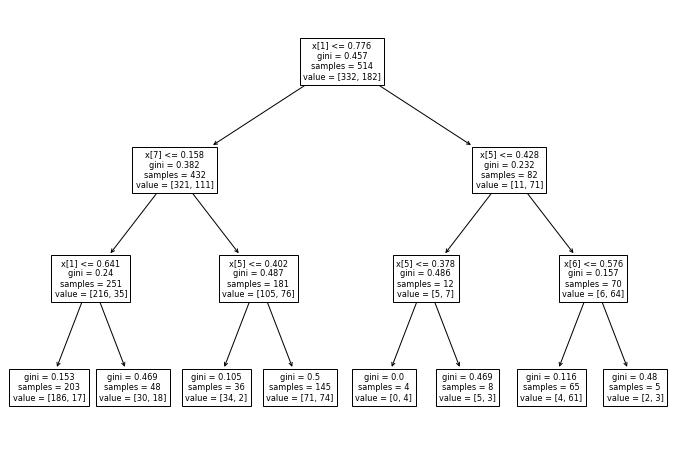

JupyterRequireError: notebook/js/codecell: Timeout. Library 'notebook/js/codecell' is not loaded.

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [39]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(clf_gini,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.72727273 0.66883117 0.7987013  0.83006536 0.7254902 ]
Average Cross Validation score :0.7500721500721501


In [40]:
from sklearn.model_selection import LeavePOut,cross_val_score

In [45]:
from sklearn.model_selection import LeaveOneOut,cross_val_score
loo=LeaveOneOut()
#tree=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)
score=cross_val_score(clf_gini,X,y,cv=loo)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 0

In [46]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
score = cross_val_score(clf_gini, X, y, scoring='accuracy', cv=cv, n_jobs=-1) #n_jobs=number of jobs running parallel
print(score)
print('Accuracy: %.3f (%.3f)' % (score.mean(), score.std()))


[0.74675325 0.79220779 0.76623377 0.73202614 0.69281046]
Accuracy: 0.746 (0.033)


In [49]:
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
rkf = RepeatedKFold(n_splits=4, n_repeats=2)
scores = []

# evaluate model
scores = cross_val_score(clf_gini, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.739 (0.055)


In [1]:
import nltk